### Without Hyperparameter

In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv("Cleaned_kidney_with_feature_engineering.csv")

In [3]:
dataset.head()

,Unnamed: 0,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.5,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.3,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [4]:
X = dataset.values[:,1:24]
y = dataset.values[:,25]

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier(criterion = 'entropy')
DTree.fit(X_train, Y_train)
y_pred =  DTree.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=Y_train, y_pred=DTree.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=Y_test, y_pred=DTree.predict(X_test)))

Accuracy Score on train data:  1.0
Accuracy Score on the test data:  0.98


In [8]:
from sklearn.metrics import confusion_matrix  
cm1 = confusion_matrix(Y_test, y_pred)  

print(cm1)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

[[57  2]
 [ 0 41]]
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98        59
         1.0       0.95      1.00      0.98        41

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



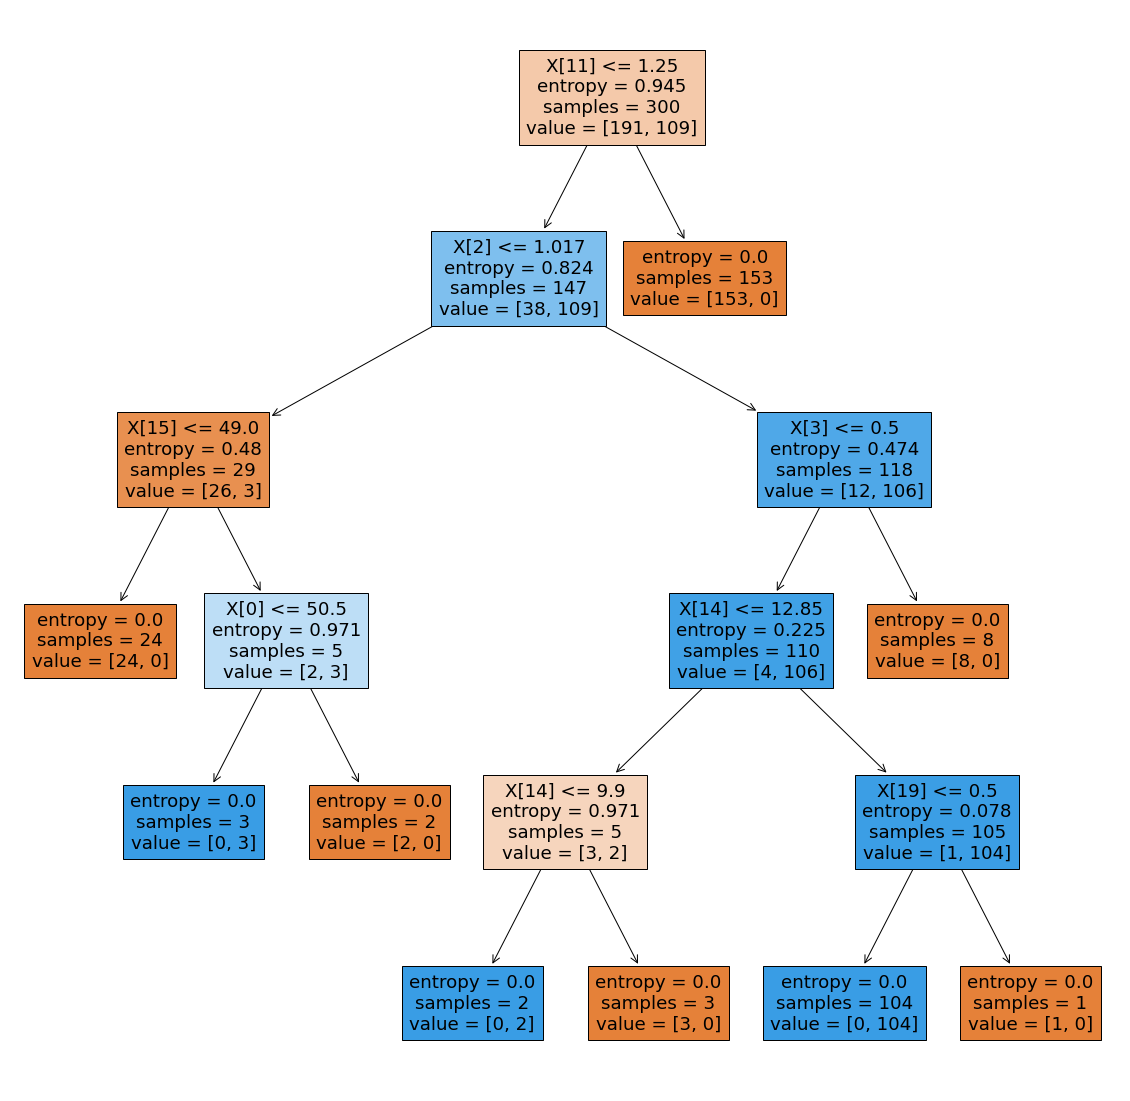

In [9]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20,20))
plot_tree(DTree, filled=True)
plt.show()

Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [11]:
from sklearn.naive_bayes import GaussianNB
nb = MultinomialNB(alpha=0, fit_prior=False)
nb.fit(X_train, Y_train)

C:\Users\Hp\.conda\envs\tensorflow\lib\site-packages\sklearn\naive_bayes.py:509: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


MultinomialNB(alpha=0, fit_prior=False)

In [12]:
print("Multinomial Naive Bayes score: ",nb.score(X_train, Y_train))

Multinomial Naive Bayes score:  0.9233333333333333


In [13]:
y_pred = nb.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_pred)

0.88

In [15]:
from sklearn.metrics import confusion_matrix  
cm2 = confusion_matrix(Y_test, y_pred)  

print(cm2)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

[[47 12]
 [ 0 41]]
              precision    recall  f1-score   support

         0.0       1.00      0.80      0.89        59
         1.0       0.77      1.00      0.87        41

    accuracy                           0.88       100
   macro avg       0.89      0.90      0.88       100
weighted avg       0.91      0.88      0.88       100



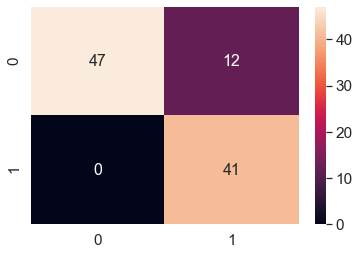

In [16]:
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm2, annot=True, annot_kws={"size": 16}) # font size

plt.show()

SVM

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [18]:
X_train_SVM = pd.DataFrame(X_train)

In [19]:
X_test_SVM = pd.DataFrame(X_test)

In [20]:
# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(100.0) 


# fit classifier to training set
svc.fit(X_train_SVM,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test_SVM)

C:\Users\Hp\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass C=100.0 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


In [21]:
# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9700


In [22]:
cm3 = confusion_matrix(Y_test, y_pred)  

print(cm3)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

[[58  1]
 [ 2 39]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        59
         1.0       0.97      0.95      0.96        41

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



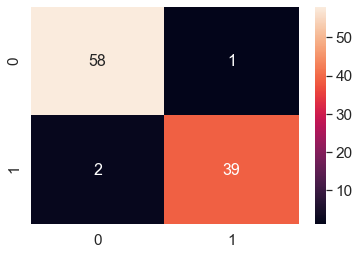

In [23]:
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm3, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Perceptron

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [25]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(eta0=0.1, random_state=0)
ppn.fit(X_train_std, Y_train)

Perceptron(eta0=0.1)

In [26]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (Y_test != y_pred).sum())

Misclassified examples: 1


In [27]:
print('Accuracy(test set): %.3f' % accuracy_score(Y_test, y_pred))
print('Accuracy (standardised test set): %.3f' % ppn.score(X_test_std, Y_test))

Accuracy(test set): 0.990
Accuracy (standardised test set): 0.990


In [28]:
cm4 = confusion_matrix(Y_test, y_pred)  

print(cm4)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

[[58  1]
 [ 0 41]]
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99        59
         1.0       0.98      1.00      0.99        41

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



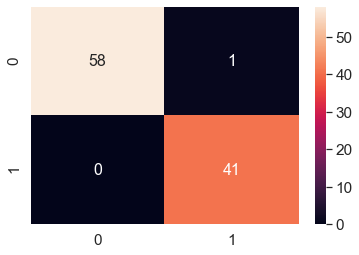

In [29]:
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm4, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [30]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from matplotlib import pyplot

C:\Users\Hp\.conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:72: FutureWarning: Pass C=100 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)


Multinomial Naive Bayes: 0.936667 (0.027689)
Decision Tree: 0.960000 (0.032660)
Perceptron: 0.950000 (0.045338)
SVC: 0.960000 (0.032660)


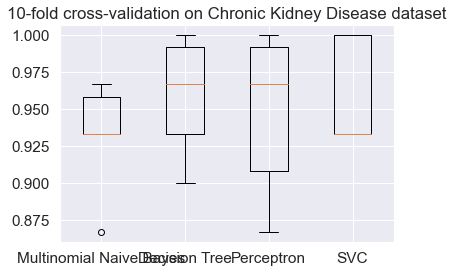

In [31]:
models = []
models.append(('Multinomial Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier(criterion = 'entropy')))
models.append(('Perceptron', Perceptron(eta0=0.1, random_state=0)))
models.append(('SVC',SVC(100)))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Chronic Kidney Disease dataset')
pyplot.show()

### With Hyperparameter

In [32]:
dataset = pd.read_csv("Cleaned_kidney_with_feature_engineering.csv")

In [33]:
dataset.head()

,Unnamed: 0,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,...,38.0,6000.0,4.5,0,0,0,0,0,0,0
2,2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,...,31.0,7500.0,4.3,0,1,0,1,0,1,0
3,3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [34]:
X = dataset.values[:,1:24]
y = dataset.values[:,25]

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state = 47, test_size = 0.25)

Decision Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier
DTree = DecisionTreeClassifier(criterion = 'entropy',max_depth=7,min_samples_leaf=5, min_samples_split=5)
DTree.fit(X_train, Y_train)
y_pred =  DTree.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=Y_train, y_pred=DTree.predict(X_train)))
print('Accuracy Score on the test data: ', accuracy_score(y_true=Y_test, y_pred=DTree.predict(X_test)))

Accuracy Score on train data:  0.9833333333333333
Accuracy Score on the test data:  0.97


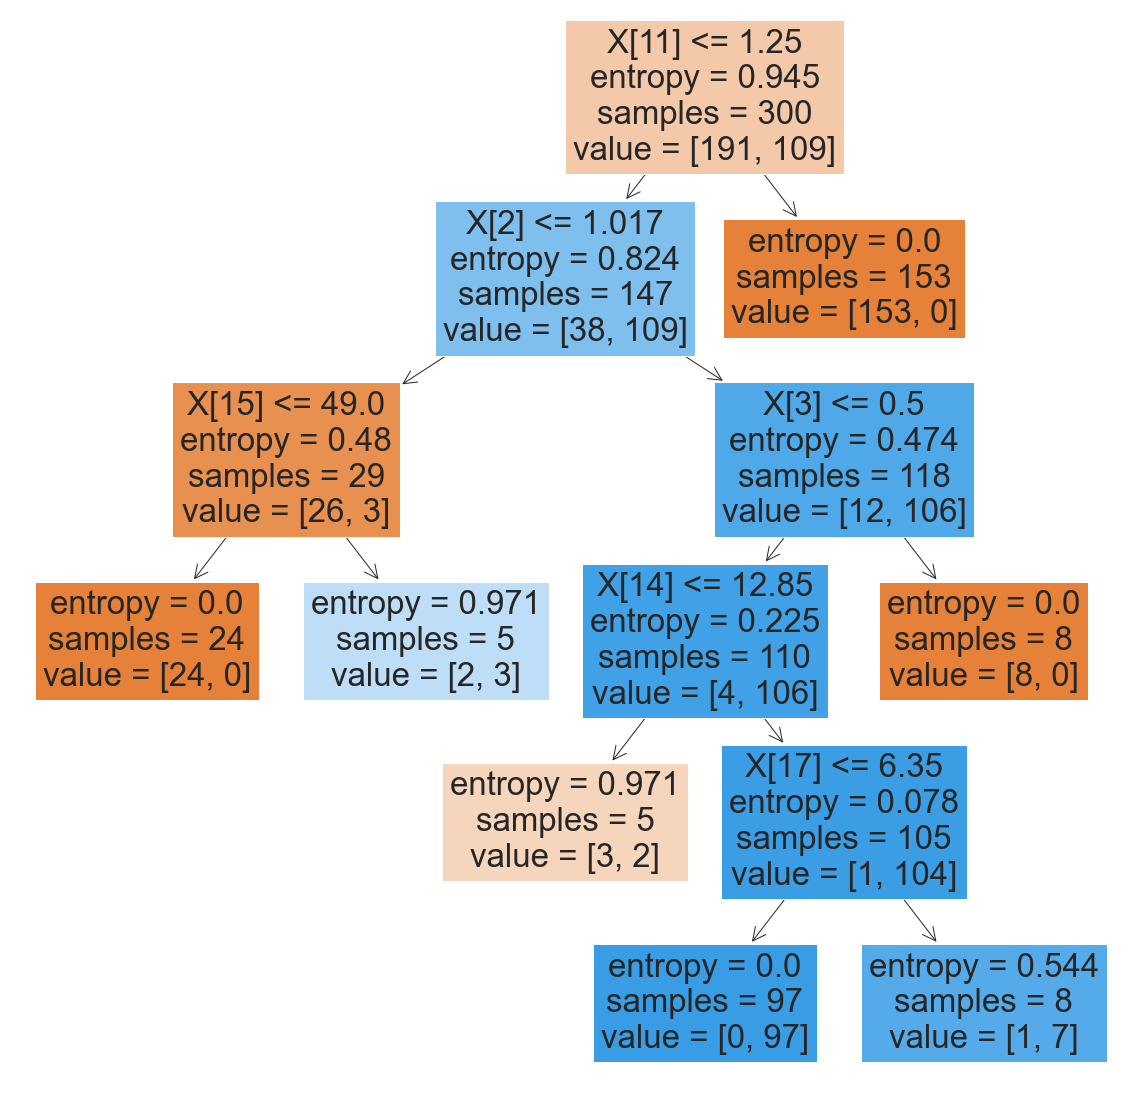

In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.figure(figsize=(20,20))
plot_tree(DTree, filled=True)
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix  
cm0 = confusion_matrix(Y_test, y_pred)  

print(cm0)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

[[57  2]
 [ 1 40]]
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97        59
         1.0       0.95      0.98      0.96        41

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
from matplotlib import pyplot

Naive Bayes

In [41]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
import seaborn as Sns

In [42]:
from sklearn.naive_bayes import GaussianNB
nb = MultinomialNB(alpha=0.2, fit_prior=True, class_prior=None)
nb.fit(X_train, Y_train)

MultinomialNB(alpha=0.2)

In [43]:
print("Naive Bayes score: ",nb.score(X_train, Y_train))

Naive Bayes score:  0.83


In [44]:
y_pred = nb.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, y_pred)

0.85

In [46]:
from sklearn.metrics import confusion_matrix  
cm1 = confusion_matrix(Y_test, y_pred)  

print(cm1)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

[[44 15]
 [ 0 41]]
              precision    recall  f1-score   support

         0.0       1.00      0.75      0.85        59
         1.0       0.73      1.00      0.85        41

    accuracy                           0.85       100
   macro avg       0.87      0.87      0.85       100
weighted avg       0.89      0.85      0.85       100



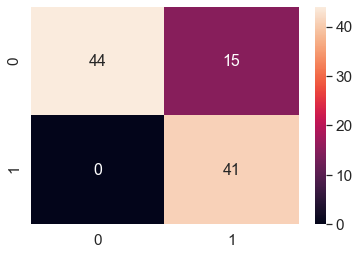

In [47]:
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm1, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [48]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

In [49]:
X_train_SVM = pd.DataFrame(X_train)

In [50]:
X_test_SVM = pd.DataFrame(X_test)

In [51]:
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC(C=25, kernel='rbf', gamma='scale') 


# fit classifier to training set
svc.fit(X_train_SVM,Y_train)


# make predictions on test set
y_pred=svc.predict(X_test_SVM)

In [52]:
print('Model accuracy score with hyperparameters: {0:0.4f}'. format(accuracy_score(Y_test, y_pred)))

Model accuracy score with hyperparameters: 0.9700


In [53]:
cm2 = confusion_matrix(Y_test, y_pred)  

print(cm2)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

[[58  1]
 [ 2 39]]
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.97        59
         1.0       0.97      0.95      0.96        41

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



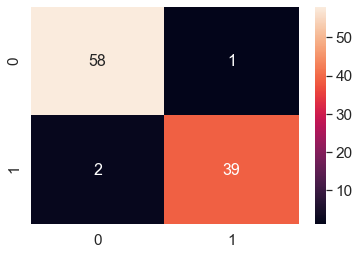

In [54]:
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm2, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Perceptron

In [55]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [56]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

ppn = Perceptron(eta0=0.1, random_state=1, max_iter=100)
ppn.fit(X_train_std, Y_train)

Perceptron(eta0=0.1, max_iter=100, random_state=1)

In [57]:
y_pred = ppn.predict(X_test_std)
print('Misclassified examples: %d' % (Y_test != y_pred).sum())

Misclassified examples: 5


In [58]:
print('Accuracy(test set): %.3f' % accuracy_score(Y_test, y_pred))
print('Accuracy (standardised test set): %.3f' % ppn.score(X_test_std, Y_test))

Accuracy(test set): 0.950
Accuracy (standardised test set): 0.950


In [59]:
cm3 = confusion_matrix(Y_test, y_pred)  

print(cm3)
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(Y_test,y_pred))

[[55  4]
 [ 1 40]]
              precision    recall  f1-score   support

         0.0       0.98      0.93      0.96        59
         1.0       0.91      0.98      0.94        41

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



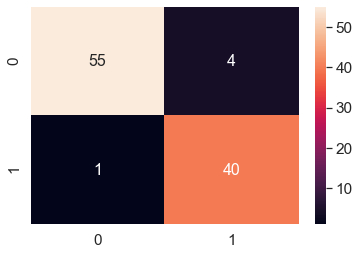

In [60]:
import seaborn as sn
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm3, annot=True, annot_kws={"size": 16}) # font size

plt.show()

Multinomial Naive Bayes: 0.936667 (0.027689)
Decision Tree: 0.966667 (0.014907)
Perceptron: 0.943333 (0.026034)
SVC: 0.960000 (0.032660)


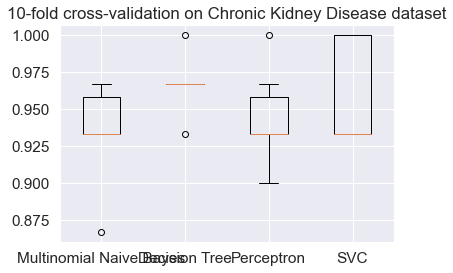

In [61]:
models = []
models.append(('Multinomial Naive Bayes', GaussianNB()))
models.append(('Decision Tree', DecisionTreeClassifier(criterion = 'entropy',max_depth=7,min_samples_leaf=5, min_samples_split=5)))
models.append(('Perceptron', Perceptron(eta0=0.1, random_state=1, max_iter=100)))
models.append(('SVC',SVC(C=25, kernel='rbf', gamma='scale')))

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=None)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))
# Compare Algorithms
pyplot.boxplot(results, labels=names)
pyplot.title('10-fold cross-validation on Chronic Kidney Disease dataset')
pyplot.show()